In [1]:
#Andy Yang
#Aresty Research Program
#Importing all the Libraries

import h5py
import pandas as pd
import numpy as np
import os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from pathlib import Path
from datetime import datetime
from collections import namedtuple
import natsort
from natsort import index_natsorted, order_by_index
import tables
import jupyterthemes
from pandas import DataFrame
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Mean Value Calculations on Layers
path = "/Address/Aresty Research Project/DATASETchallenge"
dir_list = os.listdir(path)            
print("Files and directories in '",path,"':")
print(dir_list) #List of all the .hdf5 files within a directory. 
File = namedtuple('File','name path size modified_date')
files = []

p = Path('/Address/Aresty Research Project/DATASETchallenge')

for item in p.glob('**/*'):
    if item.suffix in (['.hdf5']):
        name = item.name
        path = Path.resolve(item).parent
        size = item.stat().st_size
        modified = datetime.fromtimestamp(item.stat().st_mtime)
        files.append(File(name, path, size, modified))
        
d_x = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        x_mean = df[0].mean()
        
        d_x.append([layer,x_mean])
            
        #print(x_mean)
        
df1 = pd.DataFrame(data=d_x, columns=['file_name','mean value of x'])

df_x = pd.DataFrame(data = d_x, columns = ['file_location','mean value of x']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_x['file_location']
d_y = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        y_mean = df[1].mean()
        
        d_y.append([layer,y_mean])
            
        #print(x_mean)
        
df2 = pd.DataFrame(data=d_y, columns=['file_name','mean value of x'])

df_y = pd.DataFrame(data = d_y, columns = ['file_location','mean value of y']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_y['file_location']
d_a = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        a_mean = df[5].mean()
        
        d_a.append([layer,a_mean])
            
        #print(x_mean)
        
df3 = pd.DataFrame(data=d_a, columns=['file_name','mean value of Nominal Power'])

df_a = pd.DataFrame(data = d_a, columns = ['file_location','mean value of Laser Power Current']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_a['file_location']
d_b = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        b_mean = df[6].mean()
        
        d_b.append([layer,b_mean])
            
        #print(x_mean)
        
df4 = pd.DataFrame(data=d_b, columns=['file_name','mean value of Signal_in_a_GaAs'])

df_b = pd.DataFrame(data = d_b, columns = ['file_location','mean value of Signal_in_a_GaAs']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_b['file_location']

Files and directories in ' /Users/andyy/Aresty Research Project/DATASETchallenge ':
['labels.txt', 'layer1.hdf5', 'layer10.hdf5', 'layer100.hdf5', 'layer101.hdf5', 'layer102.hdf5', 'layer103.hdf5', 'layer104.hdf5', 'layer105.hdf5', 'layer106.hdf5', 'layer107.hdf5', 'layer108.hdf5', 'layer109.hdf5', 'layer11.hdf5', 'layer110.hdf5', 'layer111.hdf5', 'layer112.hdf5', 'layer113.hdf5', 'layer114.hdf5', 'layer115.hdf5', 'layer116.hdf5', 'layer117.hdf5', 'layer118.hdf5', 'layer119.hdf5', 'layer12.hdf5', 'layer120.hdf5', 'layer121.hdf5', 'layer122.hdf5', 'layer123.hdf5', 'layer124.hdf5', 'layer125.hdf5', 'layer126.hdf5', 'layer127.hdf5', 'layer128.hdf5', 'layer129.hdf5', 'layer13.hdf5', 'layer130.hdf5', 'layer131.hdf5', 'layer132.hdf5', 'layer133.hdf5', 'layer134.hdf5', 'layer135.hdf5', 'layer136.hdf5', 'layer137.hdf5', 'layer138.hdf5', 'layer139.hdf5', 'layer14.hdf5', 'layer140.hdf5', 'layer141.hdf5', 'layer142.hdf5', 'layer143.hdf5', 'layer144.hdf5', 'layer145.hdf5', 'layer146.hdf5', 'layer1

In [2]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import scikeras
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
df_combined = pd.concat([df_x, df_y, df_a, df_b], axis=1, join='inner')
df_combined

,mean value of x,mean value of y,mean value of Laser Power Current,mean value of Signal_in_a_GaAs
0,-23.114784,-84.830269,4488.293945,1543.055908
1,-23.101221,-84.829369,4488.886230,1518.683350
2,-23.112848,-84.828369,4489.492188,1547.233643
3,-23.100641,-84.843018,4491.976074,1508.754517
4,-23.125904,-84.842278,4492.891602,1497.558228
...,...,...,...,...
374,-23.098812,-84.815605,4491.950684,1538.949707
375,-23.113535,-84.828545,4489.677734,1553.340698
376,-23.100891,-84.841385,4489.969238,1533.481934
377,-23.112759,-84.883942,4501.448242,1492.057373


In [4]:
d_anomaly = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):

        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        anomaly_mean = df[7].mean()
        
        d_anomaly.append([layer,anomaly_mean])
            
dfg = pd.DataFrame(data=d_anomaly, columns=['file_name','anomaly values for each layer'])
df_anom = pd.DataFrame(data = d_anomaly, columns = ['file_location','anomaly values']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_anom['file_location']

In [5]:
df_combinedall = pd.concat([df_x, df_y, df_a, df_b,df_anom], axis=1, join='inner')
df_combinedall

,mean value of x,mean value of y,mean value of Laser Power Current,mean value of Signal_in_a_GaAs,anomaly values
0,-23.114784,-84.830269,4488.293945,1543.055908,1.0
1,-23.101221,-84.829369,4488.886230,1518.683350,1.0
2,-23.112848,-84.828369,4489.492188,1547.233643,1.0
3,-23.100641,-84.843018,4491.976074,1508.754517,1.0
4,-23.125904,-84.842278,4492.891602,1497.558228,1.0
...,...,...,...,...,...
374,-23.098812,-84.815605,4491.950684,1538.949707,0.0
375,-23.113535,-84.828545,4489.677734,1553.340698,1.0
376,-23.100891,-84.841385,4489.969238,1533.481934,1.0
377,-23.112759,-84.883942,4501.448242,1492.057373,1.0


In [6]:
dataset = df_combinedall.values
# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [7]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [8]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
import keras
import tensorflow as tf
opt = tf.keras.optimizers.Adam()
#learning_rate=0.00105

In [11]:
X = np.array(X)

# build a model
model = Sequential()
model.add(Dense(60, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max',
                                   patience=100000,
                                   restore_best_weights=True)

history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=1500,
                    batch_size=9,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 60)                300       
                                                                 
 dense_21 (Dense)            (None, 60)                3660      
                                                                 
 dense_22 (Dense)            (None, 1)                 61        
                                                                 
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
34/34 [==============================] - 0s 5ms/step - loss: 49.8577 - accuracy: 0.6898 - val_loss: 3.9986 - val_accuracy: 0.8553
Epoch 2/1500
34/34 [==============================] - 0s 1ms/step - loss: 8.7359 - accuracy: 0.6601 - val_loss: 2.5724 - val_accuracy: 0.8553
Epoch 3/1500
34/34 [==========

34/34 [==============================] - 0s 1ms/step - loss: 1.6602 - accuracy: 0.6799 - val_loss: 0.4418 - val_accuracy: 0.8553
Epoch 110/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.0668 - accuracy: 0.6832 - val_loss: 1.7061 - val_accuracy: 0.8553
Epoch 111/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.5798 - accuracy: 0.6634 - val_loss: 0.4335 - val_accuracy: 0.8553
Epoch 112/1500
34/34 [==============================] - 0s 1ms/step - loss: 2.0070 - accuracy: 0.6337 - val_loss: 2.1494 - val_accuracy: 0.1447
Epoch 113/1500
34/34 [==============================] - 0s 1ms/step - loss: 3.7483 - accuracy: 0.6634 - val_loss: 4.6213 - val_accuracy: 0.8553
Epoch 114/1500
34/34 [==============================] - 0s 1ms/step - loss: 6.2202 - accuracy: 0.6700 - val_loss: 6.0341 - val_accuracy: 0.1447
Epoch 115/1500
34/34 [==============================] - 0s 1ms/step - loss: 3.3260 - accuracy: 0.6403 - val_loss: 0.6732 - val_accuracy: 0.6842
Epoch 1

Epoch 166/1500
34/34 [==============================] - 0s 1ms/step - loss: 2.0344 - accuracy: 0.6601 - val_loss: 0.4323 - val_accuracy: 0.8553
Epoch 167/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.4097 - accuracy: 0.6106 - val_loss: 0.7794 - val_accuracy: 0.8553
Epoch 168/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.0793 - accuracy: 0.6997 - val_loss: 0.9872 - val_accuracy: 0.8553
Epoch 169/1500
34/34 [==============================] - 0s 970us/step - loss: 1.1196 - accuracy: 0.6700 - val_loss: 1.1521 - val_accuracy: 0.1447
Epoch 170/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.4859 - accuracy: 0.6370 - val_loss: 0.4760 - val_accuracy: 0.8553
Epoch 171/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.8050 - accuracy: 0.7030 - val_loss: 0.9245 - val_accuracy: 0.8553
Epoch 172/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.9541 - accuracy: 0.7459 - val_loss: 0.9209 - val_accurac

Epoch 223/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.0336 - accuracy: 0.7327 - val_loss: 1.0053 - val_accuracy: 0.4737
Epoch 224/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7888 - val_loss: 0.3579 - val_accuracy: 0.8553
Epoch 225/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.8086 - val_loss: 0.6573 - val_accuracy: 0.7895
Epoch 226/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.7492 - val_loss: 0.3922 - val_accuracy: 0.8684
Epoch 227/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.7699 - accuracy: 0.7723 - val_loss: 0.5270 - val_accuracy: 0.8816
Epoch 228/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.7807 - accuracy: 0.7459 - val_loss: 0.6891 - val_accuracy: 0.8684
Epoch 229/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.2896 - accuracy: 0.6271 - val_loss: 0.4758 - val_accuracy:

Epoch 280/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.9663 - accuracy: 0.7855 - val_loss: 0.4589 - val_accuracy: 0.8816
Epoch 281/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.2223 - accuracy: 0.7426 - val_loss: 1.4678 - val_accuracy: 0.8553
Epoch 282/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.0733 - accuracy: 0.7393 - val_loss: 0.3163 - val_accuracy: 0.8421
Epoch 283/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8383 - val_loss: 0.3585 - val_accuracy: 0.8553
Epoch 284/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.7457 - accuracy: 0.8020 - val_loss: 0.6086 - val_accuracy: 0.8816
Epoch 285/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.7789 - val_loss: 0.9290 - val_accuracy: 0.8816
Epoch 286/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.5431 - accuracy: 0.7558 - val_loss: 3.1342 - val_accuracy:

Epoch 337/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.8185 - val_loss: 0.3054 - val_accuracy: 0.8421
Epoch 338/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.8251 - val_loss: 0.6937 - val_accuracy: 0.7500
Epoch 339/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.8647 - val_loss: 0.3907 - val_accuracy: 0.8289
Epoch 340/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.7954 - val_loss: 1.2562 - val_accuracy: 0.5000
Epoch 341/1500
34/34 [==============================] - 0s 1ms/step - loss: 1.1645 - accuracy: 0.7525 - val_loss: 1.2012 - val_accuracy: 0.8816
Epoch 342/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.8317 - val_loss: 0.2867 - val_accuracy: 0.8947
Epoch 343/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.8555 - accuracy: 0.8020 - val_loss: 2.0816 - val_accuracy:

Epoch 394/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8317 - val_loss: 0.2870 - val_accuracy: 0.8816
Epoch 395/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.7868 - accuracy: 0.7855 - val_loss: 0.9486 - val_accuracy: 0.8026
Epoch 396/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5486 - accuracy: 0.8581 - val_loss: 0.3011 - val_accuracy: 0.8816
Epoch 397/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.8053 - val_loss: 0.4486 - val_accuracy: 0.8421
Epoch 398/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8581 - val_loss: 0.3072 - val_accuracy: 0.8421
Epoch 399/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8581 - val_loss: 0.3301 - val_accuracy: 0.8816
Epoch 400/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8812 - val_loss: 0.4735 - val_accuracy:

Epoch 451/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.8581 - val_loss: 0.5319 - val_accuracy: 0.7632
Epoch 452/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.9043 - val_loss: 0.3214 - val_accuracy: 0.8289
Epoch 453/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8812 - val_loss: 0.2850 - val_accuracy: 0.8947
Epoch 454/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.9043 - val_loss: 0.3495 - val_accuracy: 0.8816
Epoch 455/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8647 - val_loss: 0.3294 - val_accuracy: 0.8816
Epoch 456/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8911 - val_loss: 0.3747 - val_accuracy: 0.8816
Epoch 457/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8746 - val_loss: 0.4650 - val_accuracy:

Epoch 508/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.8779 - val_loss: 0.2981 - val_accuracy: 0.8421
Epoch 509/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.8449 - val_loss: 0.6872 - val_accuracy: 0.8816
Epoch 510/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8812 - val_loss: 0.2951 - val_accuracy: 0.8816
Epoch 511/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8812 - val_loss: 0.3886 - val_accuracy: 0.8816
Epoch 512/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8713 - val_loss: 0.2992 - val_accuracy: 0.9079
Epoch 513/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8746 - val_loss: 0.2800 - val_accuracy: 0.8816
Epoch 514/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.9043 - val_loss: 0.2800 - val_accuracy:

Epoch 565/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8185 - val_loss: 0.3002 - val_accuracy: 0.8816
Epoch 566/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8779 - val_loss: 0.2912 - val_accuracy: 0.8816
Epoch 567/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8878 - val_loss: 0.3226 - val_accuracy: 0.8816
Epoch 568/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.8878 - val_loss: 0.2729 - val_accuracy: 0.8947
Epoch 569/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.9010 - val_loss: 0.3541 - val_accuracy: 0.8816
Epoch 570/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8878 - val_loss: 0.7462 - val_accuracy: 0.5263
Epoch 571/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.8284 - val_loss: 0.2923 - val_accuracy:

Epoch 622/1500
34/34 [==============================] - 0s 970us/step - loss: 0.4232 - accuracy: 0.8020 - val_loss: 0.3722 - val_accuracy: 0.8289
Epoch 623/1500
34/34 [==============================] - 0s 909us/step - loss: 0.3608 - accuracy: 0.8614 - val_loss: 0.3434 - val_accuracy: 0.8553
Epoch 624/1500
34/34 [==============================] - 0s 940us/step - loss: 0.2716 - accuracy: 0.9109 - val_loss: 0.3235 - val_accuracy: 0.8816
Epoch 625/1500
34/34 [==============================] - 0s 940us/step - loss: 0.2876 - accuracy: 0.8779 - val_loss: 0.2812 - val_accuracy: 0.8947
Epoch 626/1500
34/34 [==============================] - 0s 940us/step - loss: 0.2901 - accuracy: 0.9010 - val_loss: 0.3120 - val_accuracy: 0.8816
Epoch 627/1500
34/34 [==============================] - 0s 970us/step - loss: 0.3465 - accuracy: 0.8746 - val_loss: 0.2856 - val_accuracy: 0.8947
Epoch 628/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8944 - val_loss: 0.2750 - v

Epoch 679/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.9142 - val_loss: 0.2969 - val_accuracy: 0.8816
Epoch 680/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8911 - val_loss: 0.4867 - val_accuracy: 0.8816
Epoch 681/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8812 - val_loss: 0.4028 - val_accuracy: 0.8553
Epoch 682/1500
34/34 [==============================] - 0s 968us/step - loss: 0.3318 - accuracy: 0.8812 - val_loss: 0.3140 - val_accuracy: 0.8289
Epoch 683/1500
34/34 [==============================] - 0s 940us/step - loss: 0.2768 - accuracy: 0.8944 - val_loss: 0.2890 - val_accuracy: 0.9079
Epoch 684/1500
34/34 [==============================] - 0s 970us/step - loss: 0.2889 - accuracy: 0.8911 - val_loss: 0.3380 - val_accuracy: 0.8816
Epoch 685/1500
34/34 [==============================] - 0s 940us/step - loss: 0.2837 - accuracy: 0.8911 - val_loss: 0.3823 - val_a

Epoch 792/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.8977 - val_loss: 0.3337 - val_accuracy: 0.8816
Epoch 793/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8845 - val_loss: 0.3550 - val_accuracy: 0.8816
Epoch 794/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.9076 - val_loss: 0.3194 - val_accuracy: 0.8421
Epoch 795/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8977 - val_loss: 0.2922 - val_accuracy: 0.8553
Epoch 796/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8878 - val_loss: 0.3030 - val_accuracy: 0.8947
Epoch 797/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.9010 - val_loss: 0.3725 - val_accuracy: 0.8684
Epoch 798/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2675 - accuracy: 0.9010 - val_loss: 0.2848 - val_accuracy:

Epoch 849/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8944 - val_loss: 0.4169 - val_accuracy: 0.8289
Epoch 850/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8713 - val_loss: 0.3868 - val_accuracy: 0.8289
Epoch 851/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8713 - val_loss: 0.3487 - val_accuracy: 0.8816
Epoch 852/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.9043 - val_loss: 0.2790 - val_accuracy: 0.8947
Epoch 853/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.9010 - val_loss: 0.3097 - val_accuracy: 0.8947
Epoch 854/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8845 - val_loss: 0.3296 - val_accuracy: 0.8947
Epoch 855/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.8746 - val_loss: 0.3594 - val_accuracy:

Epoch 906/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8911 - val_loss: 0.3201 - val_accuracy: 0.8684
Epoch 907/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8713 - val_loss: 0.4033 - val_accuracy: 0.8816
Epoch 908/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8944 - val_loss: 0.4574 - val_accuracy: 0.8289
Epoch 909/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.9142 - val_loss: 0.3115 - val_accuracy: 0.8947
Epoch 910/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.9142 - val_loss: 0.2569 - val_accuracy: 0.9211
Epoch 911/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.8977 - val_loss: 0.3151 - val_accuracy: 0.8947
Epoch 912/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8680 - val_loss: 0.2847 - val_accuracy:

Epoch 963/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.8878 - val_loss: 0.2684 - val_accuracy: 0.9079
Epoch 964/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.8977 - val_loss: 0.3007 - val_accuracy: 0.8947
Epoch 965/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.8944 - val_loss: 0.2587 - val_accuracy: 0.9079
Epoch 966/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.9109 - val_loss: 0.2622 - val_accuracy: 0.9079
Epoch 967/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9109 - val_loss: 0.2821 - val_accuracy: 0.8947
Epoch 968/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.9109 - val_loss: 0.3596 - val_accuracy: 0.8553
Epoch 969/1500
34/34 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8647 - val_loss: 0.2874 - val_accuracy:

Epoch 1020/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8944 - val_loss: 0.2995 - val_accuracy: 0.8947
Epoch 1021/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2586 - accuracy: 0.9109 - val_loss: 0.3383 - val_accuracy: 0.8816
Epoch 1022/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.8977 - val_loss: 0.3922 - val_accuracy: 0.8816
Epoch 1023/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.9043 - val_loss: 0.2802 - val_accuracy: 0.8947
Epoch 1024/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2584 - accuracy: 0.9010 - val_loss: 0.2572 - val_accuracy: 0.9079
Epoch 1025/1500
34/34 [==============================] - 0s 970us/step - loss: 0.2538 - accuracy: 0.9076 - val_loss: 0.3119 - val_accuracy: 0.8947
Epoch 1026/1500
34/34 [==============================] - 0s 940us/step - loss: 0.2882 - accuracy: 0.8944 - val_loss: 0.2762 - va

34/34 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8944 - val_loss: 0.3138 - val_accuracy: 0.8947
Epoch 1133/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2552 - accuracy: 0.8977 - val_loss: 0.2691 - val_accuracy: 0.9079
Epoch 1134/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.9043 - val_loss: 0.2590 - val_accuracy: 0.9079
Epoch 1135/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8911 - val_loss: 0.2616 - val_accuracy: 0.9079
Epoch 1136/1500
34/34 [==============================] - 0s 970us/step - loss: 0.2739 - accuracy: 0.8911 - val_loss: 0.2531 - val_accuracy: 0.9079
Epoch 1137/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2562 - accuracy: 0.8944 - val_loss: 0.2810 - val_accuracy: 0.8553
Epoch 1138/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.8878 - val_loss: 0.3307 - val_accuracy: 0.8816

34/34 [==============================] - 0s 940us/step - loss: 0.2790 - accuracy: 0.8977 - val_loss: 0.2997 - val_accuracy: 0.9079
Epoch 1245/1500
34/34 [==============================] - 0s 970us/step - loss: 0.2694 - accuracy: 0.9010 - val_loss: 0.3391 - val_accuracy: 0.8816
Epoch 1246/1500
34/34 [==============================] - 0s 970us/step - loss: 0.2737 - accuracy: 0.9109 - val_loss: 0.2607 - val_accuracy: 0.9211
Epoch 1247/1500
34/34 [==============================] - 0s 970us/step - loss: 0.2834 - accuracy: 0.9010 - val_loss: 0.3170 - val_accuracy: 0.8553
Epoch 1248/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.8713 - val_loss: 0.3541 - val_accuracy: 0.8421
Epoch 1249/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2717 - accuracy: 0.9142 - val_loss: 0.2780 - val_accuracy: 0.9079
Epoch 1250/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8713 - val_loss: 0.4288 - val_accuracy: 

34/34 [==============================] - 0s 1ms/step - loss: 0.3249 - accuracy: 0.8911 - val_loss: 0.2589 - val_accuracy: 0.9079
Epoch 1357/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8746 - val_loss: 0.3688 - val_accuracy: 0.8684
Epoch 1358/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8878 - val_loss: 0.3550 - val_accuracy: 0.8816
Epoch 1359/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.9043 - val_loss: 0.2667 - val_accuracy: 0.9079
Epoch 1360/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.9076 - val_loss: 0.3399 - val_accuracy: 0.8816
Epoch 1361/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.8977 - val_loss: 0.2680 - val_accuracy: 0.9079
Epoch 1362/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8944 - val_loss: 0.2736 - val_accuracy: 0.9079
E

34/34 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8779 - val_loss: 0.3764 - val_accuracy: 0.8421
Epoch 1469/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8977 - val_loss: 0.3332 - val_accuracy: 0.8421
Epoch 1470/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2724 - accuracy: 0.8911 - val_loss: 0.3311 - val_accuracy: 0.8421
Epoch 1471/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.9109 - val_loss: 0.2879 - val_accuracy: 0.8684
Epoch 1472/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.9109 - val_loss: 0.2745 - val_accuracy: 0.9079
Epoch 1473/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8845 - val_loss: 0.3184 - val_accuracy: 0.8816
Epoch 1474/1500
34/34 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.8911 - val_loss: 0.3000 - val_accuracy: 0.8421
E

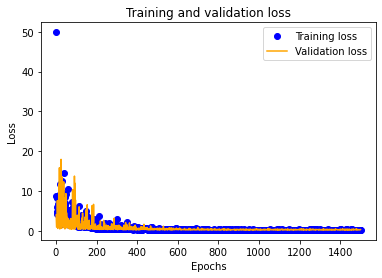

In [12]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

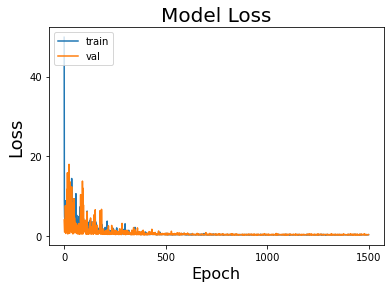

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 18)
plt.xlabel('Epoch', fontsize = 16)
plt.legend(['train', 'val'], loc='upper left')
plt.rcParams['font.size'] = '20'
#plt.figure(figsize=(100,50))
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

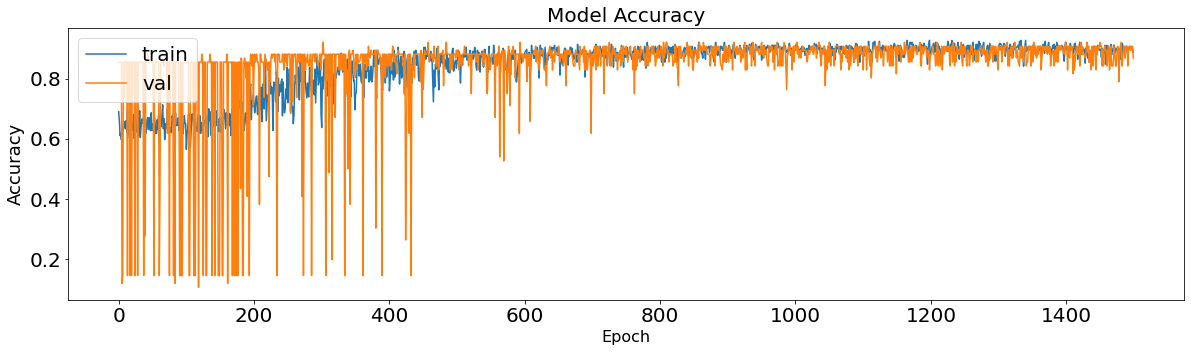

<Figure size 1440x360 with 0 Axes>

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy',fontsize = 20)
plt.ylabel('Accuracy',fontsize = 18)
plt.xlabel('Epoch',fontsize = 16)
plt.legend(['train', 'val'], loc='upper left')
plt.rcParams['font.size'] = '20'

plt.figure(figsize=(20,5))
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


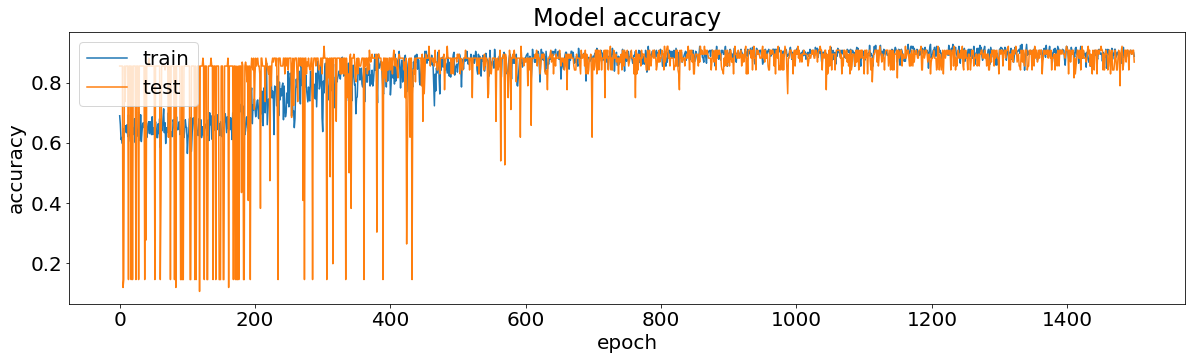

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

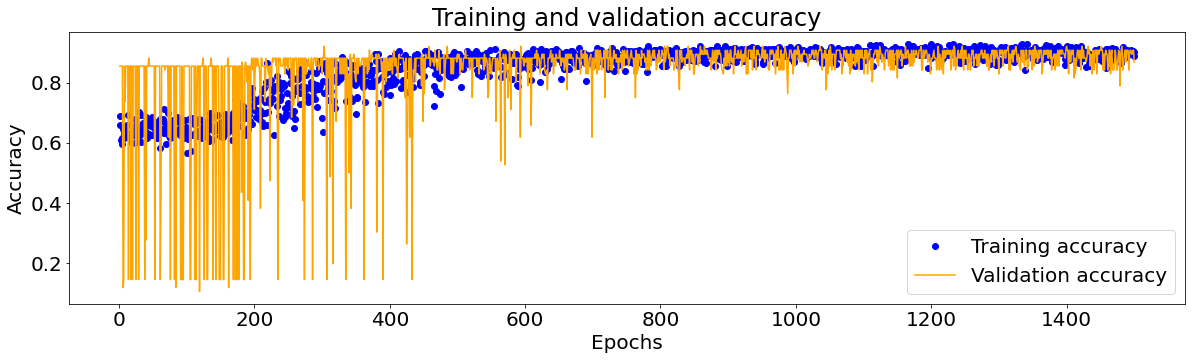

0.9210526347160339

In [16]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(Y, preds)) # order matters! (actual, predicted)

print(classification_report(Y, preds))

[[ 58  24]
 [ 14 283]]
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.75        82
         1.0       0.92      0.95      0.94       297

    accuracy                           0.90       379
   macro avg       0.86      0.83      0.85       379
weighted avg       0.90      0.90      0.90       379



[[ 58  24]
 [ 14 283]]
Precision Score :  0.899736147757256
Recall Score : 0.899736147757256


Text(0.5, 320.8, 'Predicted label')

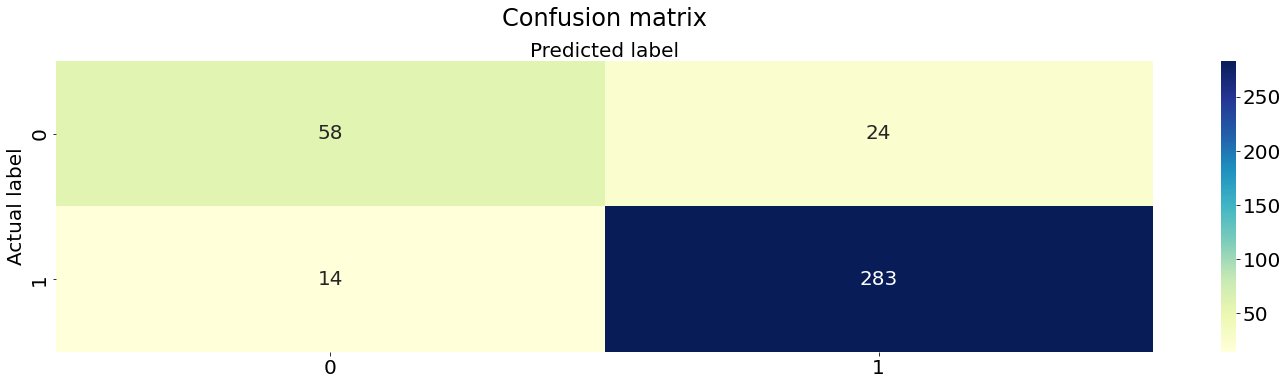

In [22]:
from sklearn.metrics import confusion_matrix

# Evaluate Model
cm = confusion_matrix(Y, preds)
print (cm)
print("Precision Score : ",precision_score(Y,preds, average ='micro'))
print("Recall Score :" , recall_score(Y, preds, average = 'micro') )

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import Callback


class LRFinder(Callback):
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

In [25]:
import numpy as np
from keras.callbacks import LearningRateScheduler

def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
  
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule( decay_factor=0.75, step_size=2)

model.fit(X, Y, callbacks=[lr_sched])

12/12 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.8971 - lr: 0.0010


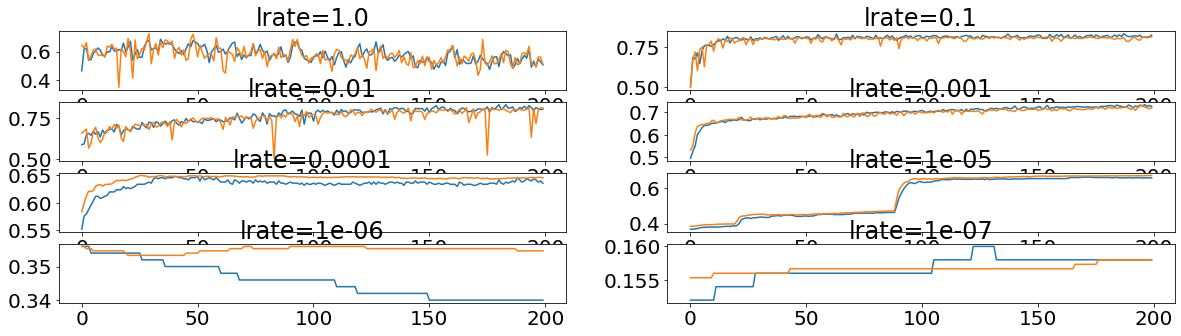

In [44]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=2000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=lrate)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('lrate='+str(lrate), pad=-50)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
pyplot.show()

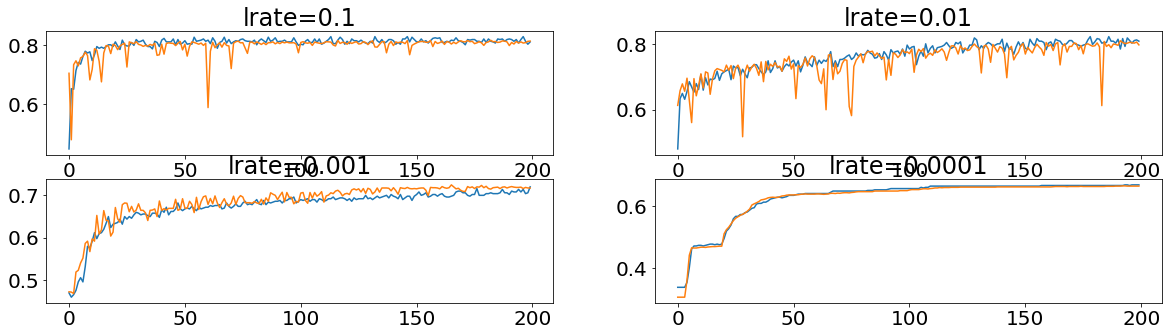

In [45]:
from matplotlib import pyplot
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a decay rate
	fit_model(trainX, trainy, testX, testy, decay_rates[i])
# show learning curves
pyplot.show()